In [55]:
import sys
assert sys.version_info>=(3,5)

import sklearn 
assert sklearn.__version__>="0.20"

import numpy as np
import pandas as pd
import os

import seaborn as sns

import matplotlib as mpl
%matplotlib inline

import matplotlib.pyplot as plt

mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

PROJECT_DIR="."
CHAPTER_ID = "Animal Disease detection"
IMAGE_PATH = os.path.join(PROJECT_DIR,"figures",CHAPTER_ID)
os.makedirs(IMAGE_PATH,exist_ok = True)

def save_fig(fig_id,tight_layout = True , fig_extension = True , resolution= 300):
    path=os.path.join(IMAGE_PATH,fig_id+"."+fig_extension)
    print("saving fig",fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [56]:
# fetching data from system
data_path=r"C:\Users\yashh\datasets\animal_disease_dataset.csv"
def load_data(path=data_path):
    return pd.read_csv(path)


In [57]:
disease = load_data()
disease.head()

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia


In [58]:
disease.describe()


,Age,Temperature
count,43778.000000,43778.000000
mean,6.769131,102.269590
std,3.886739,1.400872
min,1.000000,100.000000
25%,4.000000,101.100000
50%,7.000000,102.200000
75%,10.000000,103.400000
max,15.000000,105.000000


In [59]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43778 entries, 0 to 43777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Animal       43778 non-null  object 
 1   Age          43778 non-null  int64  
 2   Temperature  43778 non-null  float64
 3   Symptom 1    43778 non-null  object 
 4   Symptom 2    43778 non-null  object 
 5   Symptom 3    43778 non-null  object 
 6   Disease      43778 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


In [60]:
disease['Symptom 1'].value_counts()

Symptom 1
loss of appetite           10026
depression                  6770
painless lumps              4815
difficulty walking          2594
lameness                    2578
crackling sound             1991
shortness of breath         1698
fatigue                     1678
chest discomfort            1659
sweats                      1604
chills                      1597
swelling in muscle           972
swelling in limb             933
swelling in extremities      538
swelling in neck             535
swelling in abdomen          533
blisters on tongue           436
blisters on hooves           427
sores on tongue              414
sores on gums                412
blisters on mouth            410
sores on mouth               403
blisters on gums             396
sores on hooves              359
Name: count, dtype: int64

In [61]:
disease['Symptom 2'].value_counts()

Symptom 2
loss of appetite           10068
depression                  6755
painless lumps              4849
difficulty walking          2608
lameness                    2564
crackling sound             1921
chills                      1659
sweats                      1643
shortness of breath         1640
chest discomfort            1639
fatigue                     1610
swelling in muscle          1008
swelling in limb             913
swelling in abdomen          569
swelling in extremities      549
swelling in neck             533
sores on tongue              441
sores on hooves              436
blisters on gums             405
blisters on hooves           405
sores on gums                401
blisters on tongue           398
sores on mouth               387
blisters on mouth            377
Name: count, dtype: int64

In [62]:
disease['Symptom 3'].value_counts()

Symptom 3
loss of appetite           10004
depression                  6809
painless lumps              4858
difficulty walking          2603
lameness                    2536
crackling sound             1974
fatigue                     1694
sweats                      1679
shortness of breath         1639
chest discomfort            1626
chills                      1590
swelling in muscle          1005
swelling in limb             953
swelling in abdomen          578
swelling in extremities      537
swelling in neck             499
sores on gums                439
sores on mouth               431
sores on hooves              411
sores on tongue              403
blisters on hooves           395
blisters on mouth            383
blisters on gums             375
blisters on tongue           357
Name: count, dtype: int64

In [63]:
disease['Disease'].value_counts()

Disease
anthrax           9842
blackleg          9713
foot and mouth    9701
pneumonia         7330
lumpy virus       7192
Name: count, dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Temperature'}>]], dtype=object)

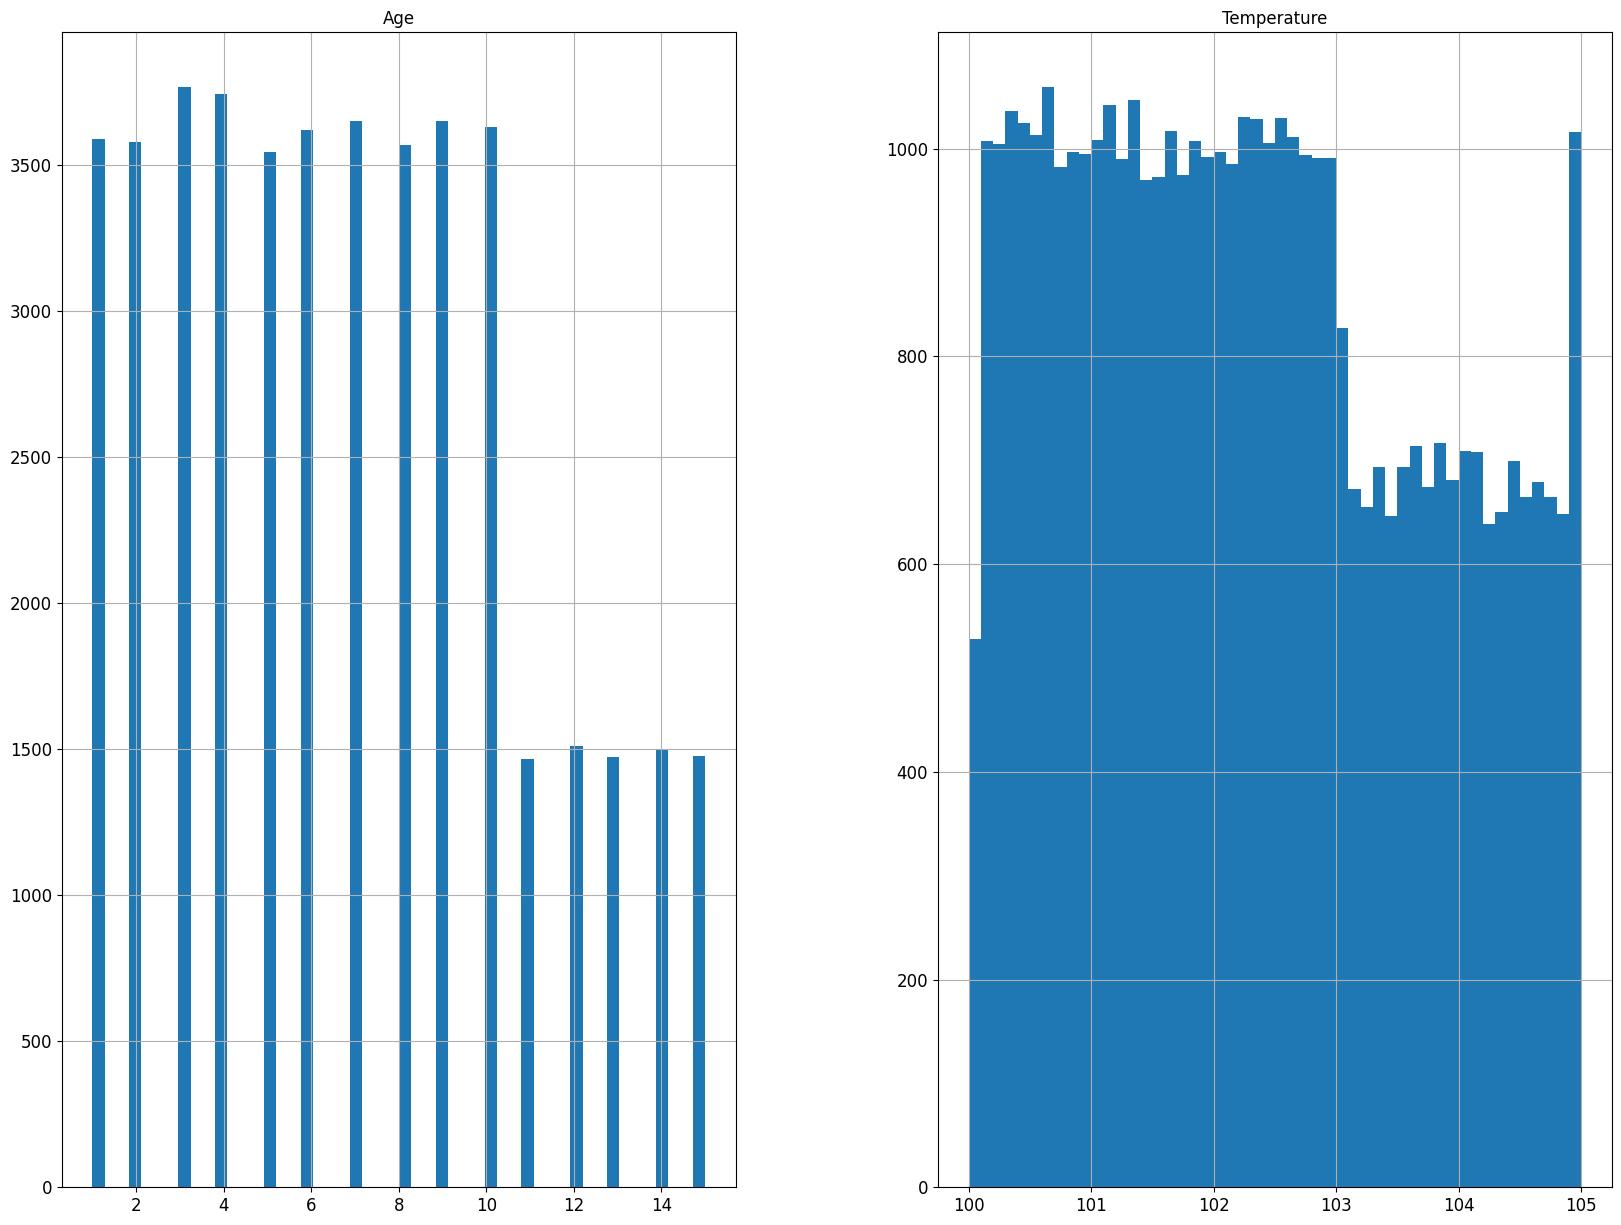

In [64]:
disease.hist(bins=50,figsize=(20,15))

<Axes: xlabel='Disease'>

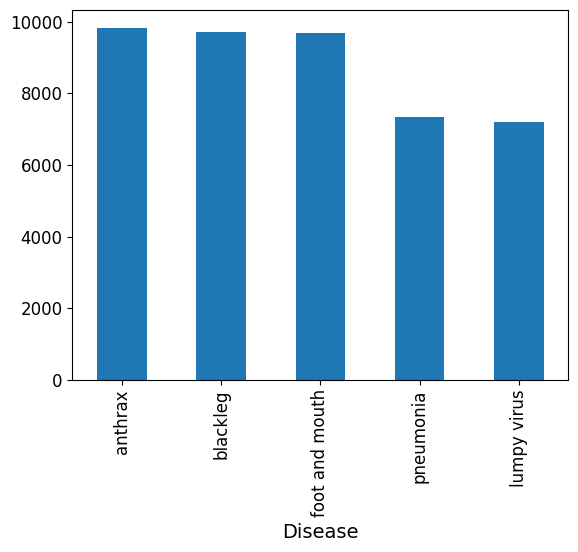

In [65]:
disease['Disease'].value_counts().plot(kind='bar')

In [66]:
# import seaborn as sns

# plt.figure(figsize=(10, 8))
# sns.heatmap(disease.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# pl

%pip install dython

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
from dython.nominal import theils_u

theils_u(disease['Animal'],disease['Disease'])

np.float64(0.000370717920562659)

In [68]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example:
cramers_v(disease['Animal'], disease['Disease'])
# cramers v is like correlation coefficient but for categorial data.

np.float64(0.01584430252104881)

In [69]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(disease['Animal'], disease['Disease'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")
# p value tells us if the null hypo is true or not and the null hypo is two variables being
# independent and lower the  p value higher the dependance.
# and chi 2 test tells if the two variables are related strongly or not

Chi2 Statistic: 44.96835452129246
p-value: 1.0434445324745116e-05


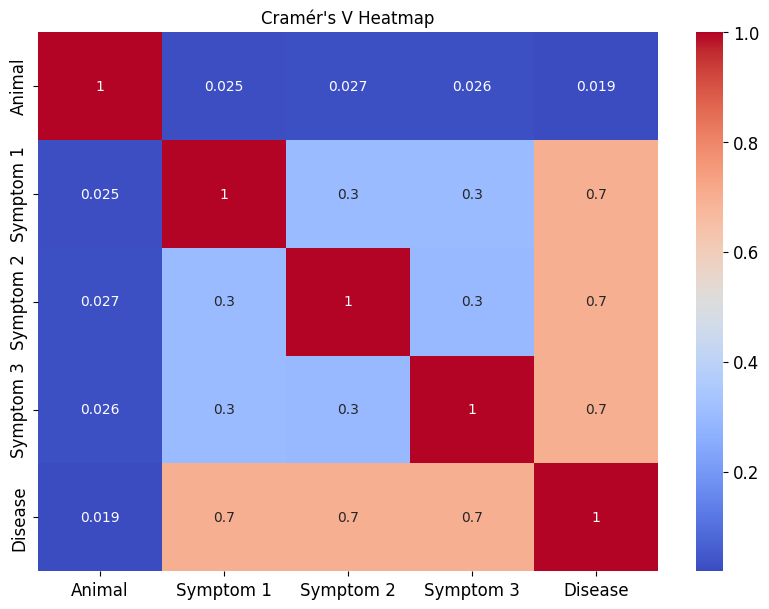

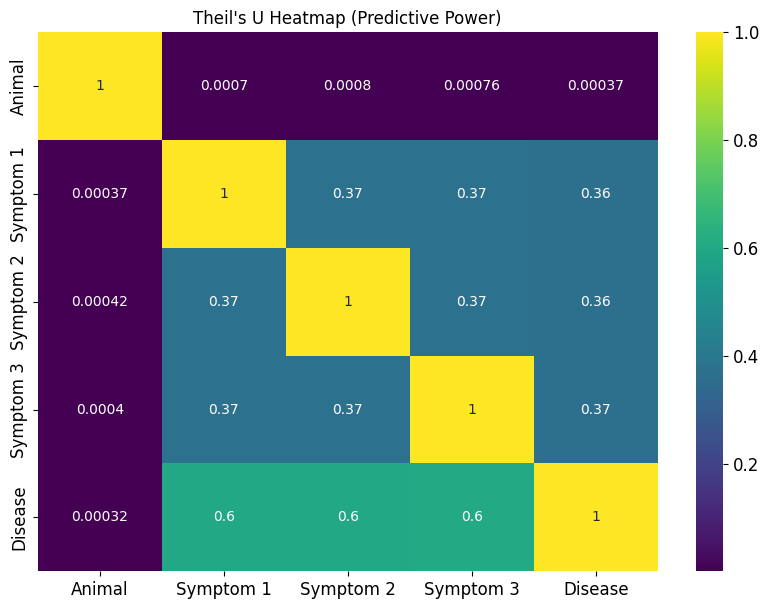

In [70]:
cat_cols = ['Animal', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Disease']

# -------------------------
# 🟦 Cramér’s V Heatmap
# -------------------------
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramer_matrix.loc[col1, col2] = cramers_v(disease[col1],disease[col2])

cramer_matrix = cramer_matrix.astype(float)

plt.figure(figsize=(10, 7))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm')
plt.title("Cramér's V Heatmap")
plt.show()

# -------------------------
# 🟨 Theil’s U Heatmap
# -------------------------
theil_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        theil_matrix.loc[col1, col2] = theils_u(disease[col1], disease[col2])

theil_matrix = theil_matrix.astype(float)

plt.figure(figsize=(10, 7))
sns.heatmap(theil_matrix, annot=True, cmap='viridis')
plt.title("Theil's U Heatmap (Predictive Power)")
plt.show()

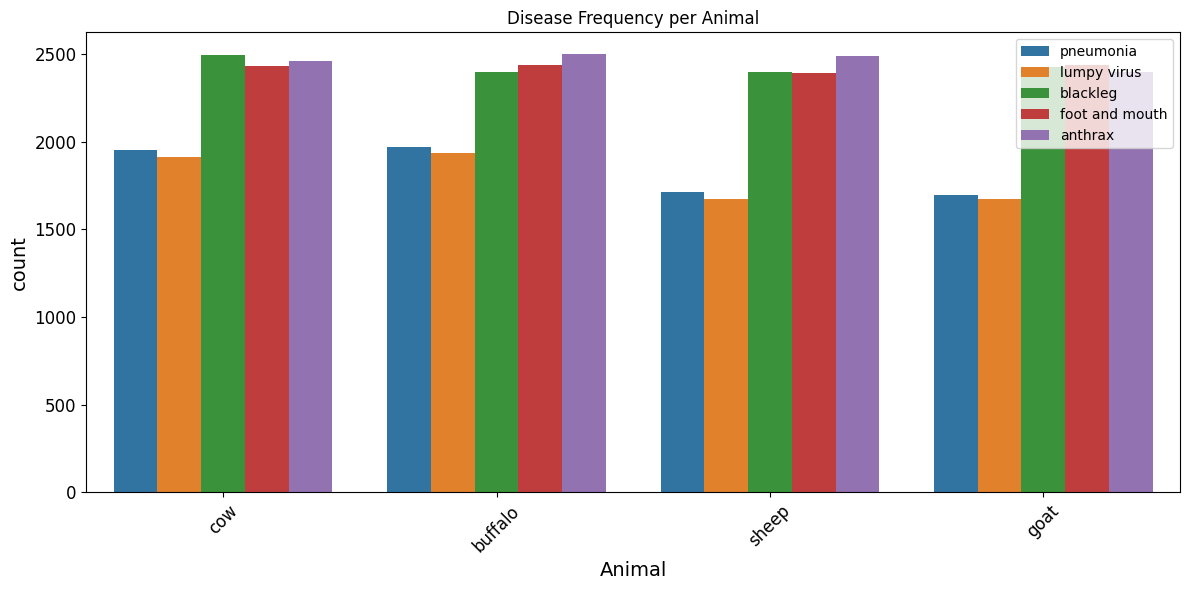

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# count of each disease per animal
plt.figure(figsize=(12,6))
sns.countplot(data= disease,x='Animal',hue='Disease')
plt.title('Disease Frequency per Animal')
plt.xticks(rotation=45) #changes the alignment of the name of the categorie
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [72]:
disease.head()

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia


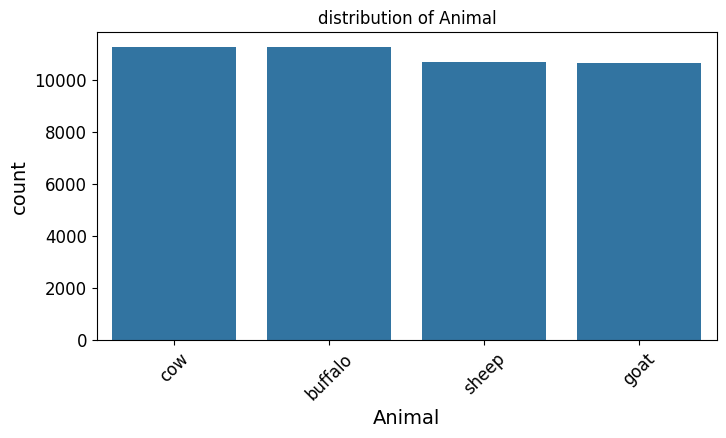

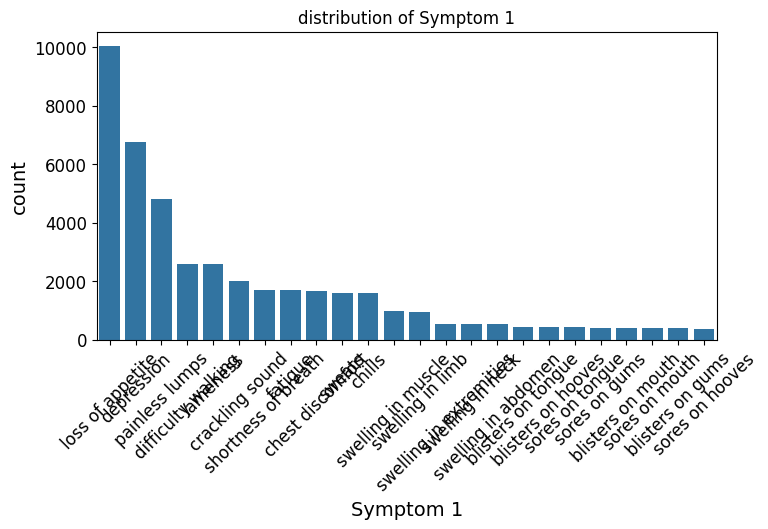

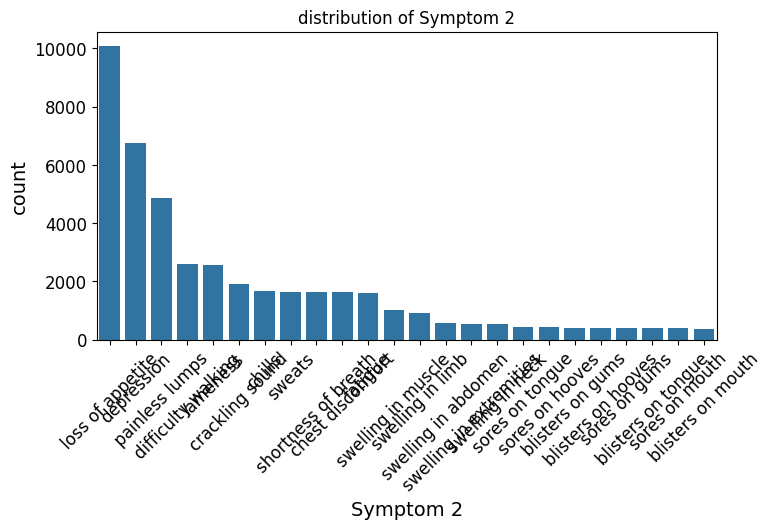

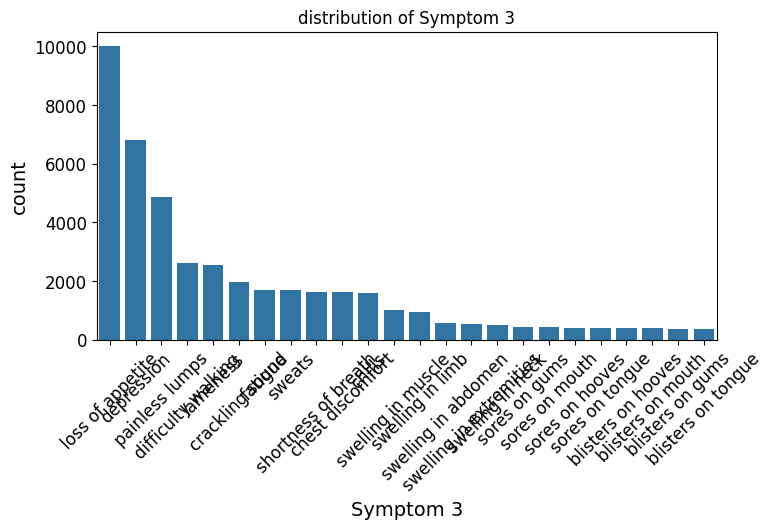

In [73]:
for col in['Animal','Symptom 1','Symptom 2','Symptom 3']:
    plt.figure(figsize=(8,4))
    sns.countplot(data = disease , x = col , order = disease[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"distribution of {col}")
    plt.show()

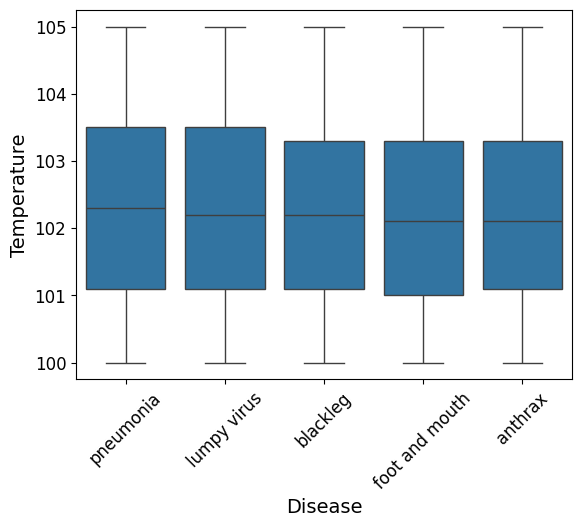

In [74]:
sns.boxplot(data=disease, x='Disease', y='Temperature')
plt.xticks(rotation=45)
plt.show()


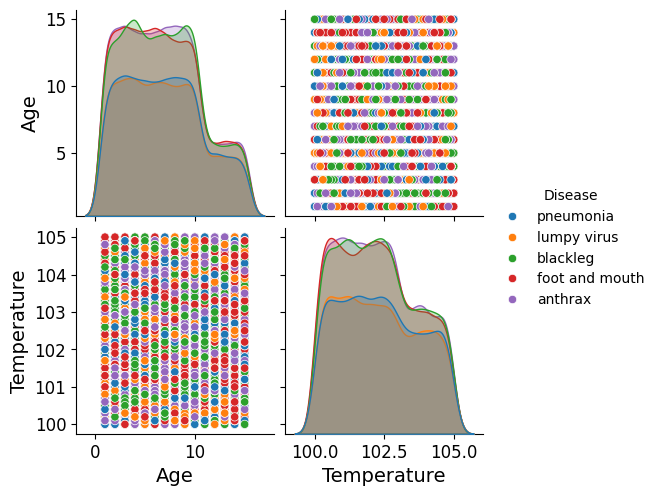

In [75]:
import seaborn as sns
sns.pairplot(disease, hue='Disease')
plt.show()

In [76]:
# checking common symptoms in animals
disease.groupby('Animal')['Symptom 1'].value_counts()

Animal   Symptom 1         
buffalo  loss of appetite      2585
         depression            1721
         painless lumps        1306
         lameness               683
         difficulty walking     632
                               ... 
sheep    sores on gums           98
         sores on mouth          95
         blisters on gums        90
         blisters on hooves      89
         sores on hooves         75
Name: count, Length: 96, dtype: int64

In [77]:
disease_not_encoded = disease.copy()

In [78]:
disease

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia
...,...,...,...,...,...,...,...
43773,goat,9,102.2,swelling in muscle,lameness,crackling sound,blackleg
43774,buffalo,3,101.8,loss of appetite,sores on mouth,difficulty walking,foot and mouth
43775,buffalo,15,104.1,swelling in extremities,chills,shortness of breath,anthrax
43776,cow,9,104.9,crackling sound,lameness,swelling in muscle,blackleg


In [79]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

import pandas as pd

# Example data
# df = pd.DataFrame({
#     'Animal': ['cow', 'buffalo', 'sheep'],
#     'Symptom 1': ['fever', 'painless lumps', 'depression'],
#     'Symptom 2': ['loss of appetite', 'loss of appetite', 'painless lumps'],
#     'Symptom 3': ['cough', 'depression', 'loss of appetite'],
#     'disease_encoded': [1, 2, 3]
# })

# Step 1: Get all unique symptoms
all_symptoms = pd.unique(disease[['Symptom 1', 'Symptom 2', 'Symptom 3']].values.ravel())
# print(all_symptoms)
# # Step 2: Create binary columns
for symptom in all_symptoms:
    disease[f'symptom_{symptom}'] = disease[['Symptom 1', 'Symptom 2', 'Symptom 3']].apply(
        lambda row: int(symptom in row.values), axis=1
    )

# # # Drop original symptom columns if you want
disease.drop(columns=['Symptom 1', 'Symptom 2', 'Symptom 3'], inplace=True)

# # # print(df.head())
print(disease)

        Animal  Age  Temperature         Disease  symptom_depression  \
0          cow    3        103.1       pneumonia                   1   
1      buffalo   13        104.5     lumpy virus                   1   
2        sheep    1        100.5     lumpy virus                   1   
3          cow   14        100.3        blackleg                   0   
4        sheep    2        103.6       pneumonia                   1   
...        ...  ...          ...             ...                 ...   
43773     goat    9        102.2        blackleg                   0   
43774  buffalo    3        101.8  foot and mouth                   0   
43775  buffalo   15        104.1         anthrax                   0   
43776      cow    9        104.9        blackleg                   0   
43777  buffalo    4        103.5  foot and mouth                   0   

       symptom_painless lumps  symptom_loss of appetite  \
0                           1                         1   
1                

In [80]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits =1, test_size =0.2, random_state = 42)
for train_index, test_index in split.split(disease,disease['Disease']):
    strat_train_set=disease.loc[train_index]
    strat_test_set = disease.loc[test_index]

strat_train_set.head()

disease_copy= disease.copy()
disease = strat_train_set.copy()
disease = strat_train_set.drop("Disease",axis=1)
disease_train_labels = strat_train_set['Disease'].copy()
disease.info()


<class 'pandas.core.frame.DataFrame'>
Index: 35022 entries, 1088 to 36169
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Animal                           35022 non-null  object 
 1   Age                              35022 non-null  int64  
 2   Temperature                      35022 non-null  float64
 3   symptom_depression               35022 non-null  int64  
 4   symptom_painless lumps           35022 non-null  int64  
 5   symptom_loss of appetite         35022 non-null  int64  
 6   symptom_swelling in limb         35022 non-null  int64  
 7   symptom_crackling sound          35022 non-null  int64  
 8   symptom_blisters on gums         35022 non-null  int64  
 9   symptom_difficulty walking       35022 non-null  int64  
 10  symptom_blisters on tongue       35022 non-null  int64  
 11  symptom_lameness                 35022 non-null  int64  
 12  symptom_blisters on 

In [81]:
disease_train_labels

1088        lumpy virus
25790           anthrax
23550          blackleg
24445          blackleg
37314    foot and mouth
              ...      
6701        lumpy virus
16941           anthrax
42500       lumpy virus
15711       lumpy virus
36169          blackleg
Name: Disease, Length: 35022, dtype: object

In [82]:
disease_test=strat_test_set.drop(columns = ['Disease'])
disease_test_labels = strat_test_set['Disease']

print(disease_test)
print(disease_test_labels)

        Animal  Age  Temperature  symptom_depression  symptom_painless lumps  \
15525    sheep    2        101.3                   1                       1   
13104    sheep    3        104.6                   1                       1   
17030      cow    8        101.2                   1                       1   
33930      cow    8        100.6                   0                       0   
42963     goat   10        100.6                   0                       0   
...        ...  ...          ...                 ...                     ...   
9130   buffalo    1        102.2                   0                       0   
14856      cow    7        102.3                   1                       0   
32023    sheep    9        102.1                   0                       0   
37977  buffalo    5        103.0                   1                       0   
23473     goat    4        102.6                   1                       1   

       symptom_loss of appetite  sympto

In [83]:

from sklearn.preprocessing import LabelEncoder
le_animal = LabelEncoder()
le_labels = LabelEncoder()
disease['Animal']=le_animal.fit_transform(disease['Animal'])
disease_test['Animal']=le_animal.transform(disease_test['Animal'])
disease_train_labels=le_labels.fit_transform(disease_train_labels)
disease_test_labels =le_labels.transform(disease_test_labels)

In [84]:
disease_test

,Animal,Age,Temperature,symptom_depression,symptom_painless lumps,symptom_loss of appetite,symptom_swelling in limb,symptom_crackling sound,symptom_blisters on gums,symptom_difficulty walking,...,symptom_sores on tongue,symptom_sores on gums,symptom_fatigue,symptom_sweats,symptom_chest discomfort,symptom_sores on hooves,symptom_swelling in abdomen,symptom_swelling in muscle,symptom_blisters on hooves,symptom_swelling in neck
15525,3,2,101.3,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13104,3,3,104.6,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17030,1,8,101.2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33930,1,8,100.6,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
42963,2,10,100.6,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9130,0,1,102.2,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
14856,1,7,102.3,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32023,3,9,102.1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
37977,0,5,103.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
disease.head()

,Animal,Age,Temperature,symptom_depression,symptom_painless lumps,symptom_loss of appetite,symptom_swelling in limb,symptom_crackling sound,symptom_blisters on gums,symptom_difficulty walking,...,symptom_sores on tongue,symptom_sores on gums,symptom_fatigue,symptom_sweats,symptom_chest discomfort,symptom_sores on hooves,symptom_swelling in abdomen,symptom_swelling in muscle,symptom_blisters on hooves,symptom_swelling in neck
1088,3,1,104.4,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25790,0,11,100.9,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
23550,3,7,102.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24445,0,3,100.9,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
37314,0,2,103.5,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


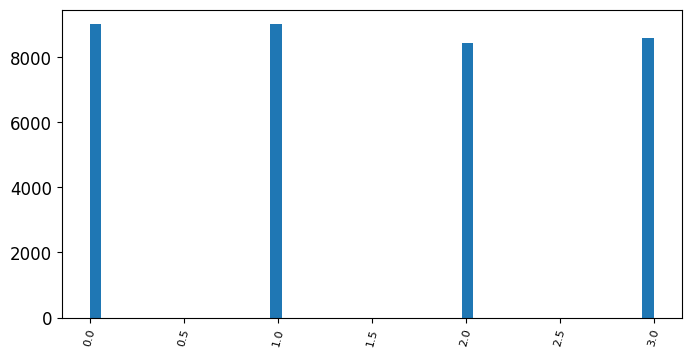

Animal



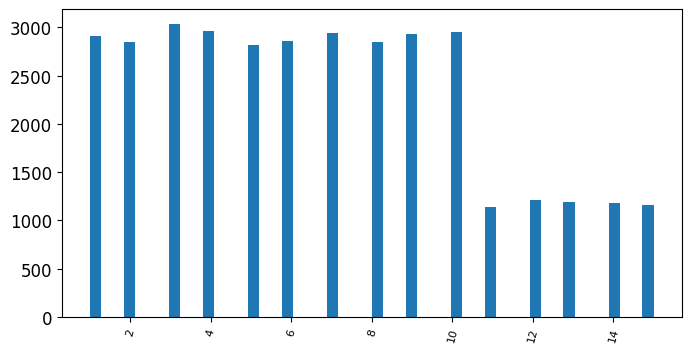

Age



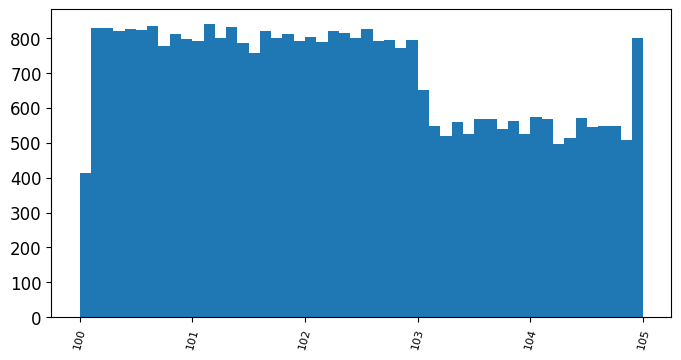

Temperature



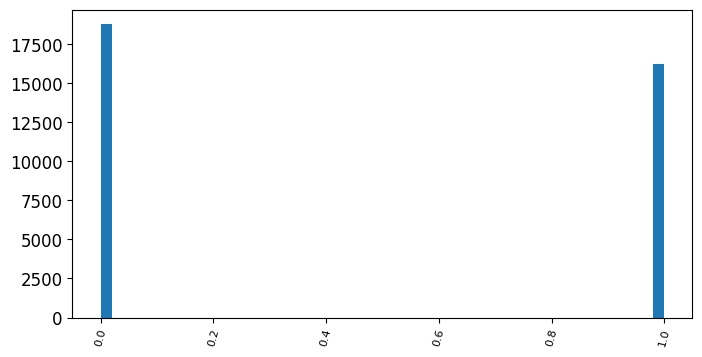

symptom_depression



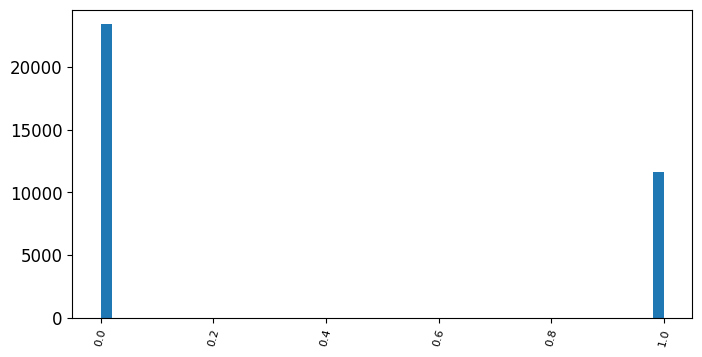

symptom_painless lumps



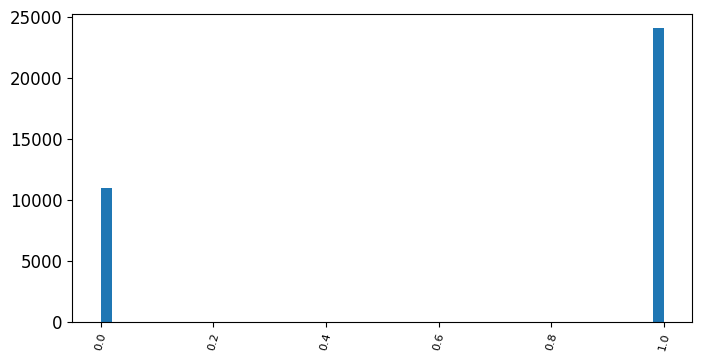

symptom_loss of appetite



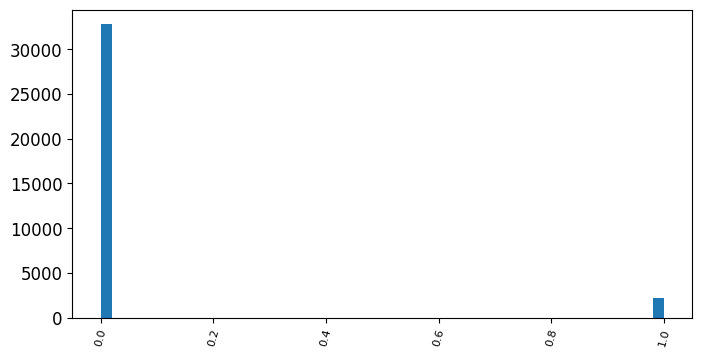

symptom_swelling in limb



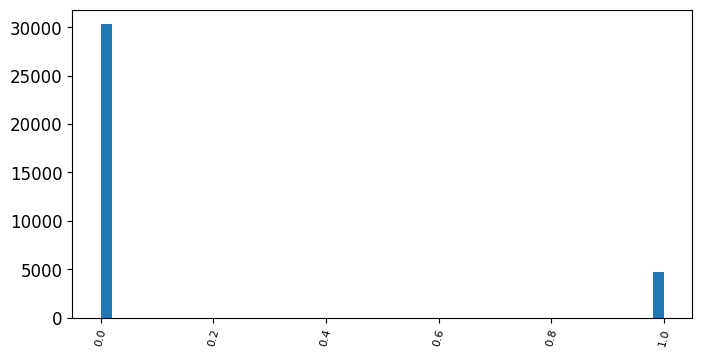

symptom_crackling sound



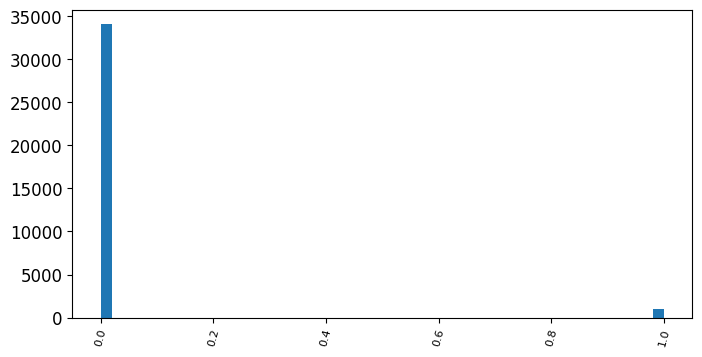

symptom_blisters on gums



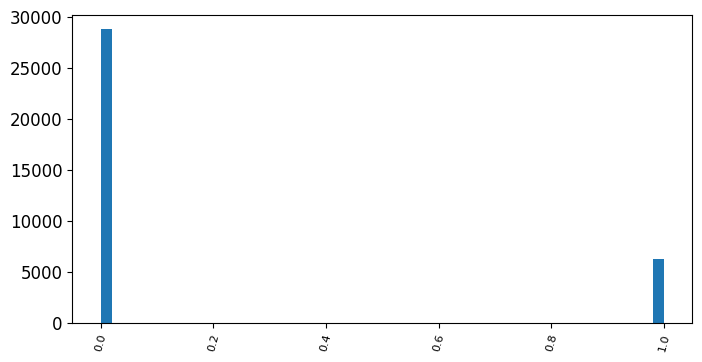

symptom_difficulty walking



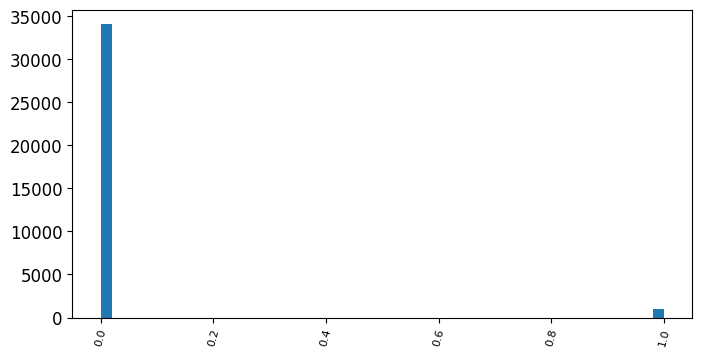

symptom_blisters on tongue



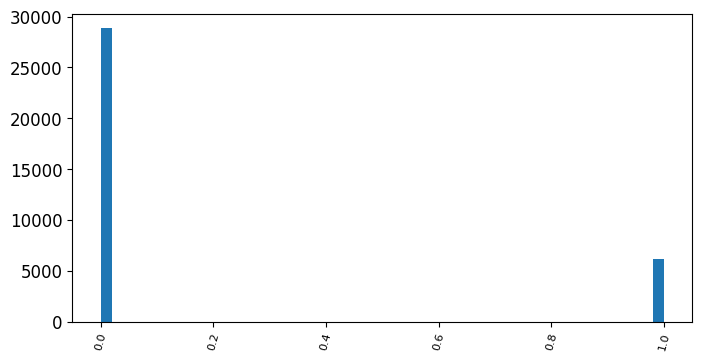

symptom_lameness



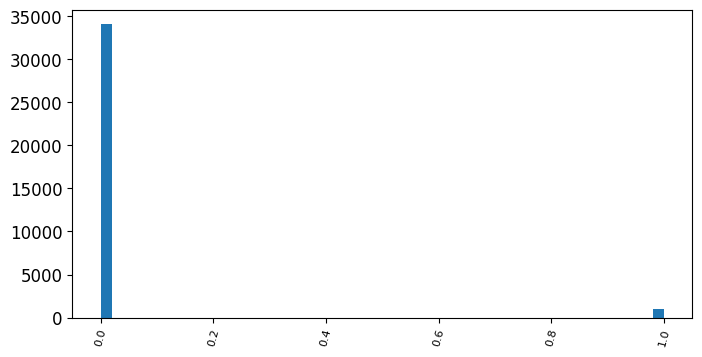

symptom_blisters on mouth



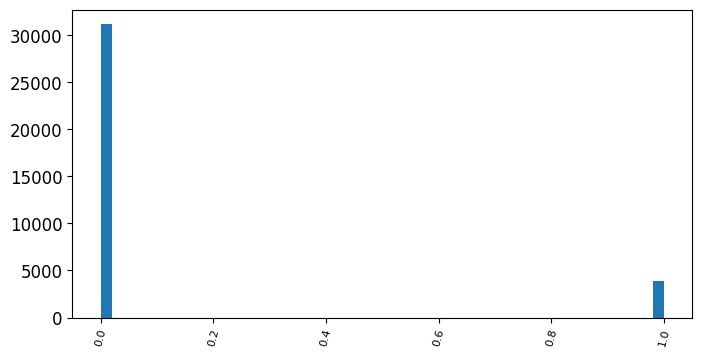

symptom_chills



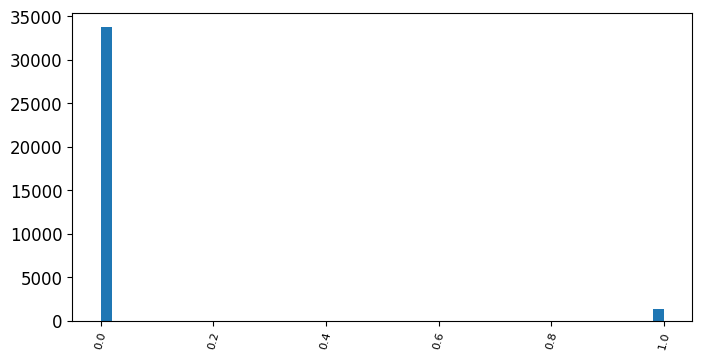

symptom_swelling in extremities



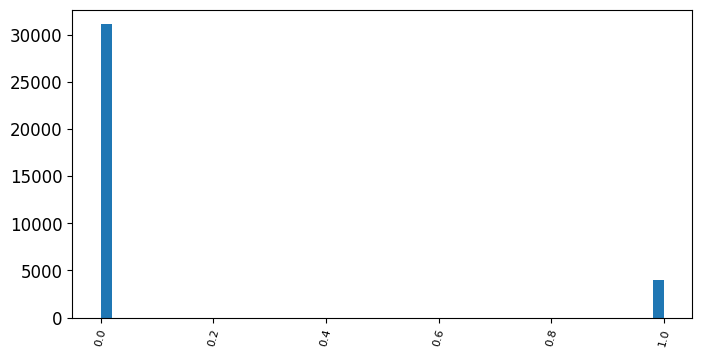

symptom_shortness of breath



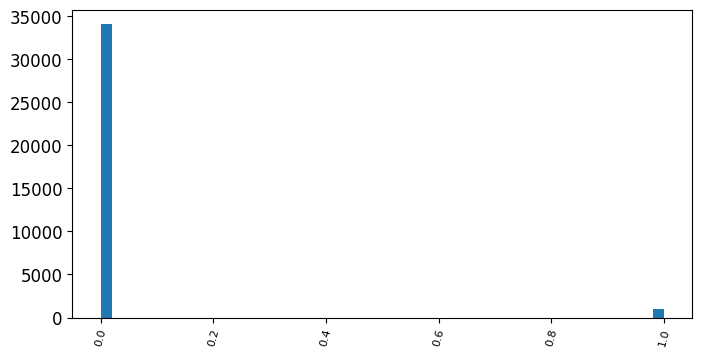

symptom_sores on mouth



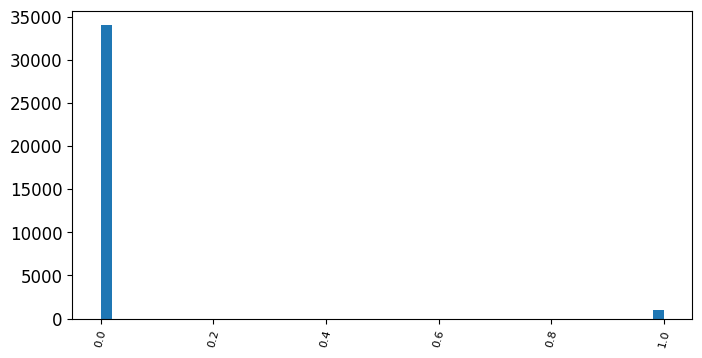

symptom_sores on tongue



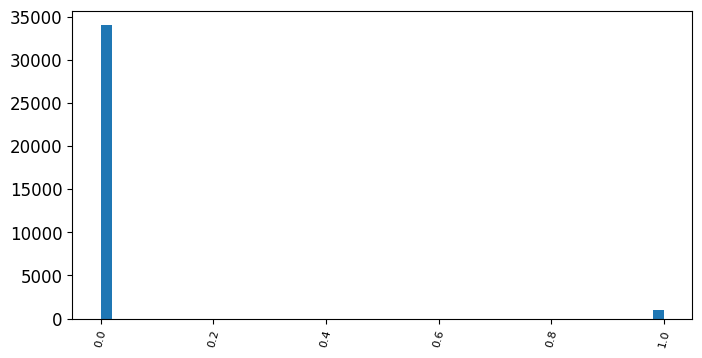

symptom_sores on gums



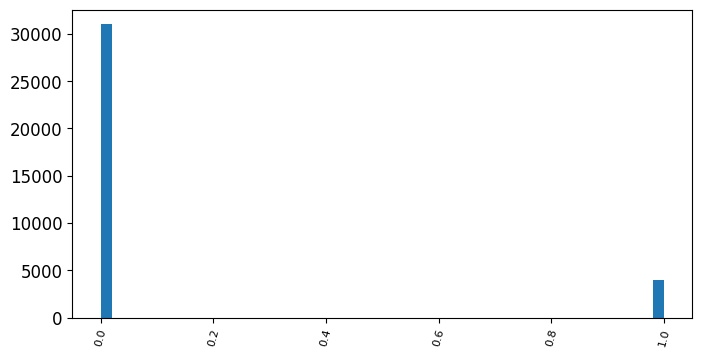

symptom_fatigue



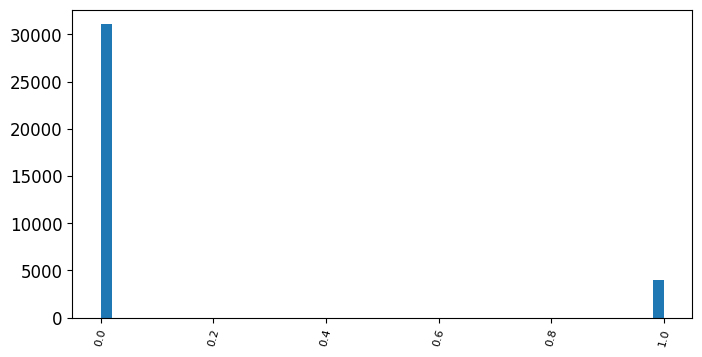

symptom_sweats



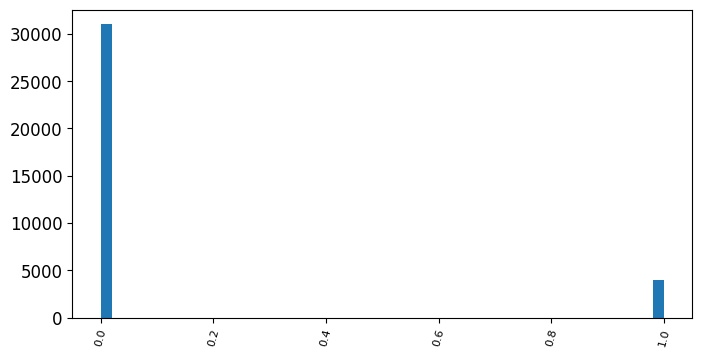

symptom_chest discomfort



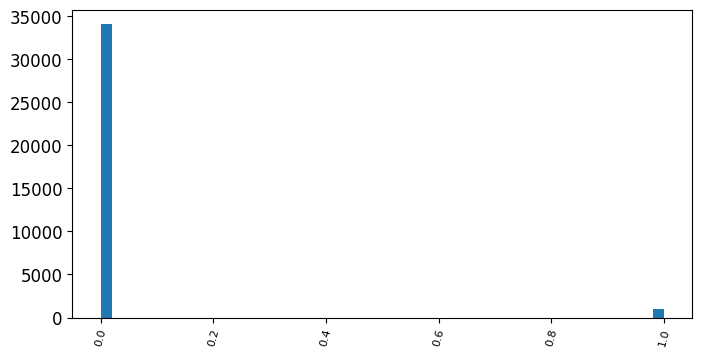

symptom_sores on hooves



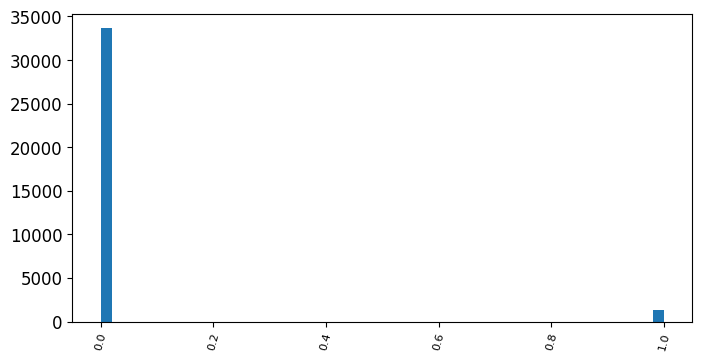

symptom_swelling in abdomen



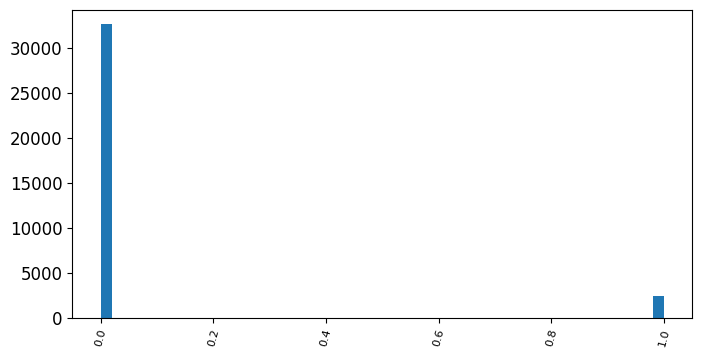

symptom_swelling in muscle



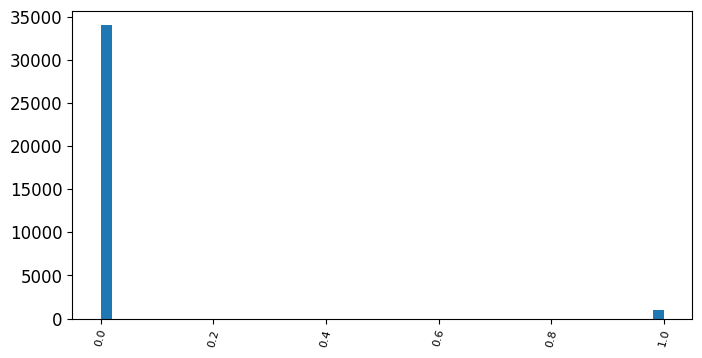

symptom_blisters on hooves



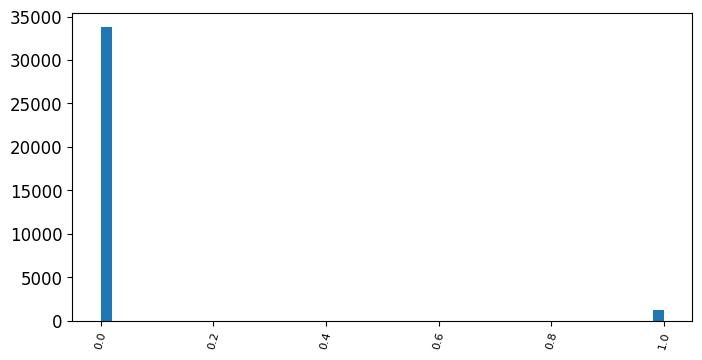

symptom_swelling in neck



In [86]:
cols =disease.columns.tolist()
for col in cols:
    plt.figure(figsize=(8,4))
    plt.hist(disease[col],bins=50)
    plt.xticks(rotation=75,fontsize=8)
    plt.show()
    print(f"{col}\n")

In [87]:
disease.head()

,Animal,Age,Temperature,symptom_depression,symptom_painless lumps,symptom_loss of appetite,symptom_swelling in limb,symptom_crackling sound,symptom_blisters on gums,symptom_difficulty walking,...,symptom_sores on tongue,symptom_sores on gums,symptom_fatigue,symptom_sweats,symptom_chest discomfort,symptom_sores on hooves,symptom_swelling in abdomen,symptom_swelling in muscle,symptom_blisters on hooves,symptom_swelling in neck
1088,3,1,104.4,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25790,0,11,100.9,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
23550,3,7,102.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24445,0,3,100.9,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
37314,0,2,103.5,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [99]:
disease.columns

Index(['Animal', 'Age', 'Temperature', 'symptom_depression',
       'symptom_painless lumps', 'symptom_loss of appetite',
       'symptom_swelling in limb', 'symptom_crackling sound',
       'symptom_blisters on gums', 'symptom_difficulty walking',
       'symptom_blisters on tongue', 'symptom_lameness',
       'symptom_blisters on mouth', 'symptom_chills',
       'symptom_swelling in extremities', 'symptom_shortness of breath',
       'symptom_sores on mouth', 'symptom_sores on tongue',
       'symptom_sores on gums', 'symptom_fatigue', 'symptom_sweats',
       'symptom_chest discomfort', 'symptom_sores on hooves',
       'symptom_swelling in abdomen', 'symptom_swelling in muscle',
       'symptom_blisters on hooves', 'symptom_swelling in neck'],
      dtype='object')

In [88]:

import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score, f1_score, make_scorer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import chi2_contingency
from xgboost import XGBClassifier

rf_base = RandomForestClassifier(
    random_state=42
)

xgb_base = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

In [89]:
# Define scoring
f1_macro_scorer = make_scorer(f1_score, average='macro')

In [90]:
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}
xgb_param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [91]:
rf_random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=rf_param_dist,
    n_iter=8,
    scoring=f1_macro_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=xgb_param_dist,
    n_iter=8,
    scoring=f1_macro_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)

In [92]:
disease

,Animal,Age,Temperature,symptom_depression,symptom_painless lumps,symptom_loss of appetite,symptom_swelling in limb,symptom_crackling sound,symptom_blisters on gums,symptom_difficulty walking,...,symptom_sores on tongue,symptom_sores on gums,symptom_fatigue,symptom_sweats,symptom_chest discomfort,symptom_sores on hooves,symptom_swelling in abdomen,symptom_swelling in muscle,symptom_blisters on hooves,symptom_swelling in neck
1088,3,1,104.4,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25790,0,11,100.9,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
23550,3,7,102.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24445,0,3,100.9,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
37314,0,2,103.5,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,0,12,104.6,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16941,1,5,101.3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
42500,1,15,104.1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15711,1,13,102.6,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
rf_random_search.fit(disease, disease_train_labels)
xgb_random_search.fit(disease, disease_train_labels)

C:\Users\yashh\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:23:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 6, ...], 'n_estimators': [50, 100, ...], ...}"
,n_iter,8
,scoring,make_scorer(f...average=macro)
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [94]:
print("Best RF params:", rf_random_search.best_params_)
print("Best XGB params:", xgb_random_search.best_params_)

Best RF params: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 10, 'class_weight': 'balanced'}
Best XGB params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [95]:
# Get best estimators
rf_best = rf_random_search.best_estimator_
xgb_best = xgb_random_search.best_estimator_
disease_test_labels

array([3, 3, 3, ..., 0, 1, 3], shape=(8756,))

In [96]:
# Evaluate models
for model_name, model in [("Random Forest", rf_best), ("XGBoost", xgb_best)]:
    disease_pred = model.predict(disease_test)
    accuracy = accuracy_score(disease_test_labels, disease_pred)
    
    test_classes = np.unique(disease_test_labels)
    target_names = le_labels.inverse_transform(test_classes)
# Classification report
    report = classification_report(
        disease_test_labels,
        disease_pred,
        labels=test_classes,
        target_names=target_names,
        zero_division=1
    )
    
    print(f"=== {model_name} ===")
    print(f"Accuracy: {accuracy:.4f}")

=== Random Forest ===
Accuracy: 0.8165
=== XGBoost ===
Accuracy: 0.8270


In [97]:
# from sklearn.svm import SVC
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import classification_report, accuracy_score
# from scipy.stats import uniform

# # Define the parameter space for random search
# param_dist = {
#     'C': uniform(0.1, 10),         # Continuous range for regularization
#     'gamma': uniform(0.001, 1),    # Continuous range for gamma
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
# }

# # Initialize the SVM model
# svm_model = SVC()

# # Randomized Search with 5-fold cross-validation
# random_search = RandomizedSearchCV(
#     estimator=svm_model,
#     param_distributions=param_dist,
#     n_iter=8,            # Number of random parameter combinations to try
#     scoring='accuracy',
#     cv=3,                 # 5-fold cross-validation
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit on the training data
# random_search.fit(disease, disease_train_labels)

# # Best parameters found
# print("Best Parameters:", random_search.best_params_)

# # Best estimator
# best_svm = random_search.best_estimator_

# # Train the best model on full training set
# best_svm.fit(disease, disease_train_labels)

# # Predict on test set
# disease_pred = best_svm.predict(disease_test)

# # Evaluate
# print("\nAccuracy on Test Set:", accuracy_score(disease_test_labels, disease_pred))
# print("\nClassification Report:\n")
# print(classification_report(disease_test_labels, disease_pred, zero_division=1))


In [98]:
import joblib

# Save the encoders and model
joblib.dump(le_animal, "le_animal.pkl")
joblib.dump(le_labels, "le_labels.pkl")
joblib.dump(rf_best, "best_model.pkl")  # Or xgb_best / best_svm


['best_model.pkl']